# Explore the data

This jupyter notebook is dedicated to exploring the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import colors
import numpy as np
import operator

## 1. Open and view all the files

In [2]:
GO=pd.read_csv('../data/GO_Processes_In_Resistance.csv')
PF_genes=pd.read_csv('../data/PFalciparum_Gene_GOterms.csv')
train=pd.read_csv('../data/SubCh1_TrainingData.csv')
test=pd.read_csv('../data/SubCh1_TestData.csv')

In [3]:
GO.head()

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance
0,GO:0020033,antigenic variation,0
1,GO:0098609,cell-cell adhesion,1
2,GO:0020035,"cytoadherence to microvasculature, mediated by...",1
3,GO:0020013,modulation by symbiont of host erythrocyte agg...,1
4,GO:0042000,translocation of peptides or proteins into host,0


In [4]:
GO.shape

(539, 3)

In [5]:
PF_genes.head()

,Gene ID,Genomic Location (Gene),Product Description,Computed GO Component IDs,Computed GO Components,Computed GO Function IDs,Computed GO Functions,Computed GO Process IDs,Computed GO Processes,Curated GO Component IDs,Curated GO Components,Curated GO Function IDs,Curated GO Functions,Curated GO Process IDs,Curated GO Processes,EC numbers,EC numbers from OrthoMCL
0,PF3D7_0100100,"Pf3D7_01_v3:29,510..37,126(+)","erythrocyte membrane protein 1, PfEMP1",GO:0016021,integral component of membrane,GO:0046789,host cell surface receptor binding,GO:0009405,pathogenesis,GO:0020002;GO:0020030,host cell plasma membrane;infected host cell s...,GO:0050839,cell adhesion molecule binding,GO:0020033;GO:0098609;GO:0020035;GO:0020013,antigenic variation;cell-cell adhesion;cytoadh...,NaN,NaN
1,PF3D7_0100200,"Pf3D7_01_v3:38,982..40,207(-)",rifin,NaN,NaN,NaN,NaN,NaN,NaN,GO:0020036;GO:0020002;GO:0020003,Maurer's cleft;host cell plasma membrane;symbi...,NaN,NaN,GO:0020033;GO:0020035;GO:0020013,antigenic variation;cytoadherence to microvasc...,NaN,NaN
2,PF3D7_0100300,"Pf3D7_01_v3:42,367..46,507(-)","erythrocyte membrane protein 1, PfEMP1",GO:0016021,integral component of membrane,GO:0046789,host cell surface receptor binding,GO:0009405,pathogenesis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PF3D7_0100400,"Pf3D7_01_v3:50,363..51,636(+)",rifin,NaN,NaN,NaN,NaN,NaN,NaN,GO:0020036;GO:0020002;GO:0020003,Maurer's cleft;host cell plasma membrane;symbi...,GO:0046812,host cell surface binding,GO:0020033;GO:0020035;GO:0020013,antigenic variation;cytoadherence to microvasc...,NaN,NaN
4,PF3D7_0100500,"Pf3D7_01_v3:53,169..53,280(-)","erythrocyte membrane protein 1 (PfEMP1), exon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
PF_genes.shape

(5758, 17)

In [7]:
train.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [8]:
train.shape

(272, 5546)

In [9]:
test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,0.416583,-2.304394,-1.279308,-1.128485,0.129698,...,0.117763,-1.650283,-0.520373,-1.301428,-5.326124,-0.352736,-1.567931,-4.446439,-1.875440,NaN
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,0.247195,-2.176939,-1.470318,-0.676434,-0.206543,...,0.472336,-1.151134,-0.342707,-1.001569,-5.337602,-0.672201,-1.494983,-4.299427,-1.553652,NaN
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,-0.197699,-0.572531,0.270896,0.557528,-0.698585,...,-0.309768,-6.330446,-0.850889,-1.603832,-3.256602,-2.517157,-0.650735,-4.841146,0.153951,NaN
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,0.966916,-1.723830,-1.102392,-0.797996,0.032847,...,-0.254186,-1.516661,-1.916219,-1.858716,-6.483167,-0.827476,-1.454423,-5.264615,-2.367444,NaN
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,0.125273,-1.665749,-2.510245,-1.454094,-1.763451,...,0.653097,-2.383878,-2.731928,-2.557962,-5.697488,-3.466542,-2.147289,-4.358510,-1.929927,NaN


In [10]:
test.shape

(200, 5546)

(array([ 2.,  5.,  8., 17., 34., 49., 61., 48., 34., 14.]),
 array([-4.88476204, -4.4575967 , -4.03043136, -3.60326603, -3.17610069,
        -2.74893535, -2.32177001, -1.89460467, -1.46743934, -1.040274  ,
        -0.61310866]),
 <a list of 10 Patch objects>)

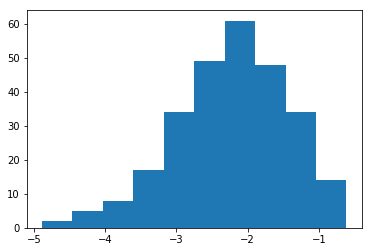

In [11]:
plt.hist(train["PF3D7_0100100"])

In [12]:
list_A = [1, 2, 3]
list_B = [3, 4, 5]
intersection = list( set(list_A) & set(list_B))
intersection

[3]

## 2. Find important genes

"""
SECTION DESCRIPTION HERE
"""

### 2.1 Add column "gene_count" and "genes" to the GO dataframe

From the dataframe PF_genes, extract the "Curated GO Process ID" and add it to the GO dataframe by matching them to the column "GO Process ID"

### 2.1.1 Create new DataFrame Gene_to_Curated_GO_Process_ID_df

In [13]:
Gene_to_Go_Process_df=pd.DataFrame({'Gene_ID':PF_genes['Gene ID'],\
                                               'Curated_Go_Process_IDs':PF_genes['Curated GO Process IDs']})
Gene_to_Go_Process_df.head(10)

,Gene_ID,Curated_Go_Process_IDs
0,PF3D7_0100100,GO:0020033;GO:0098609;GO:0020035;GO:0020013
1,PF3D7_0100200,GO:0020033;GO:0020035;GO:0020013
2,PF3D7_0100300,NaN
3,PF3D7_0100400,GO:0020033;GO:0020035;GO:0020013
4,PF3D7_0100500,NaN
5,PF3D7_0100600,GO:0020033
6,PF3D7_0100700,NaN
7,PF3D7_0100800,GO:0020033;GO:0020035;GO:0020013
8,PF3D7_0100900,GO:0020033;GO:0020035;GO:0020013
9,PF3D7_0101000,GO:0020033;GO:0020035;GO:0020013


In [14]:
Gene_to_Go_Process_df.dropna(inplace=True)
Gene_to_Go_Process_df['Curated_Go_Process_IDs']=\
    Gene_to_Go_Process_df['Curated_Go_Process_IDs']\
    .str.split(';', n=-1)

In [15]:
Gene_to_Go_Process_df.head(10)

,Gene_ID,Curated_Go_Process_IDs
0,PF3D7_0100100,"[GO:0020033, GO:0098609, GO:0020035, GO:0020013]"
1,PF3D7_0100200,"[GO:0020033, GO:0020035, GO:0020013]"
3,PF3D7_0100400,"[GO:0020033, GO:0020035, GO:0020013]"
5,PF3D7_0100600,[GO:0020033]
7,PF3D7_0100800,"[GO:0020033, GO:0020035, GO:0020013]"
8,PF3D7_0100900,"[GO:0020033, GO:0020035, GO:0020013]"
9,PF3D7_0101000,"[GO:0020033, GO:0020035, GO:0020013]"
12,PF3D7_0101300,[GO:0042000]
15,PF3D7_0101600,"[GO:0020033, GO:0020035, GO:0020013]"
17,PF3D7_0101800,[GO:0020013]


### 2.1.2 Reorganize Gene_to_Go_Process_df to map each Curated_Go_Process_ID to the corresponding Gene_ID

In [16]:
GO_Process_to_Gene_list=[]

for idx, row in Gene_to_Go_Process_df.iterrows():
    for GO_Process in row['Curated_Go_Process_IDs']:
        GO_Process_to_Gene_list.append([GO_Process,row['Gene_ID']])

GO_Process_to_Gene_df=pd.DataFrame(GO_Process_to_Gene_list, 
                                   columns=['Curated_Go_Process_IDs','Gene_ID'])

In [17]:
GO_Process_to_Gene_df.sort_values('Curated_Go_Process_IDs', 
                                 inplace=True)
GO_Process_to_Gene_df.reset_index(drop=True,inplace=True)

In [18]:
GO_Process_to_Gene_df=GO_Process_to_Gene_df\
.groupby('Curated_Go_Process_IDs')['Gene_ID']\
.apply(list).to_frame()

In [19]:
GO_Process_to_Gene_df.reset_index(inplace=True)

In [20]:
GO_Process_to_Gene_df.head(10)

,Curated_Go_Process_IDs,Gene_ID
0,GO:0000027,"[PF3D7_API03500, PF3D7_0729400, PF3D7_0921800,..."
1,GO:0000042,[PF3D7_0621350]
2,GO:0000045,[PF3D7_1015900]
3,GO:0000055,"[PF3D7_1423000, PF3D7_0729300]"
4,GO:0000070,[PF3D7_1130700]
5,GO:0000079,[PF3D7_1304700]
6,GO:0000165,[PF3D7_1113900]
7,GO:0000184,[PF3D7_1005500]
8,GO:0000209,[PF3D7_1211800]
9,GO:0000226,"[PF3D7_1008700, PF3D7_0803700]"


### 2.1.3 Add the column Gene_Count to the GO_Process_to_Gene_df

In [21]:
Gene_Count=[len(gene_list) for gene_list in list(GO_Process_to_Gene_df["Gene_ID"])]
GO_Process_to_Gene_df['Gene_Count']=Gene_Count
GO_Process_to_Gene_df.head()

,Curated_Go_Process_IDs,Gene_ID,Gene_Count
0,GO:0000027,"[PF3D7_API03500, PF3D7_0729400, PF3D7_0921800,...",9
1,GO:0000042,[PF3D7_0621350],1
2,GO:0000045,[PF3D7_1015900],1
3,GO:0000055,"[PF3D7_1423000, PF3D7_0729300]",2
4,GO:0000070,[PF3D7_1130700],1


### 2.1.4 Merge the DataFrames Go and GO_Process_IDs by the GO_Process column

In [22]:
GO=pd.merge(GO,GO_Process_to_Gene_df,left_on='GO Process ID',
             right_on='Curated_Go_Process_IDs')
GO.drop('Curated_Go_Process_IDs', axis=1, inplace=True)
GO.head()

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0020033,antigenic variation,0,"[PF3D7_0100600, PF3D7_1254000, PF3D7_1200100, ...",202
1,GO:0098609,cell-cell adhesion,1,"[PF3D7_1041300, PF3D7_0412700, PF3D7_1100100, ...",57
2,GO:0020035,"cytoadherence to microvasculature, mediated by...",1,"[PF3D7_0200600, PF3D7_1300200, PF3D7_0413200, ...",165
3,GO:0020013,modulation by symbiont of host erythrocyte agg...,1,"[PF3D7_1101100, PF3D7_1200600, PF3D7_1200100, ...",190
4,GO:0042000,translocation of peptides or proteins into host,0,"[PF3D7_0101300, PF3D7_0114100, PF3D7_0713100, ...",10


### 2.2 Find the distribution of Gene_Count

Text(0.5, 1.0, 'Gene_Count distribution: All GO Processes')

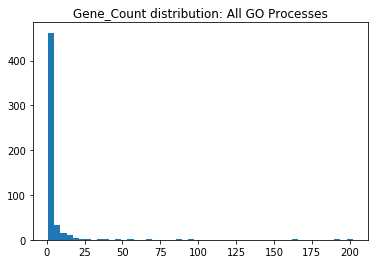

In [23]:
plt.hist(GO['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: All GO Processes')

Text(0.5, 1.0, 'Gene_Count distribution: GO Processes not involved in Artemisin Resistance')

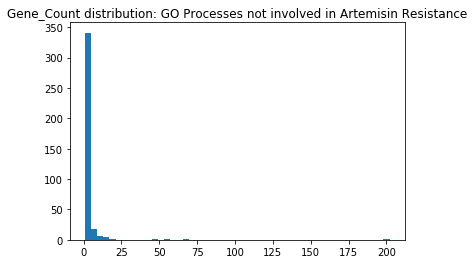

In [24]:
plt.hist(GO[GO['IsInvolvedInArtemisinResistance']==0]['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: GO Processes not involved in Artemisin Resistance')

Text(0.5, 1.0, 'Gene_Count distribution: GO Processes involved in Artemisin Resistance')

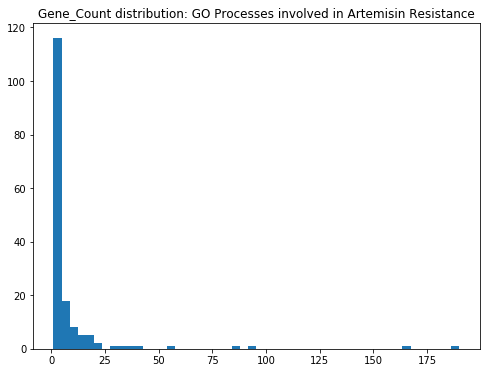

In [25]:
plt.figure(figsize=(8,6))
plt.hist(GO[GO['IsInvolvedInArtemisinResistance']==1]['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: GO Processes involved in Artemisin Resistance')

### 2.3 Filter the GO DataFrame

Keep the Go Processes Involved in Artemisin Resistance and Gene_Count <= 25

In [26]:
GO=GO[GO['IsInvolvedInArtemisinResistance']==1].reset_index(drop=True)
GO=GO[GO['Gene_Count']<=25].reset_index(drop=True)

In [27]:
GO.head(10)

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0015031,protein transport,1,"[PF3D7_1434700, PF3D7_0501300, PF3D7_0103100, ...",6
1,GO:0042147,"retrograde transport, endosome to Golgi",1,"[PF3D7_0103100, PF3D7_1250300, PF3D7_1110500, ...",4
2,GO:0015860,purine nucleoside transmembrane transport,1,"[PF3D7_1347200, PF3D7_0103200]",2
3,GO:2001139,negative regulation of phospholipid transport,1,[PF3D7_0104200],1
4,GO:0015914,phospholipid transport,1,"[PF3D7_0104200, PF3D7_1463500, PF3D7_1219600]",3
5,GO:0060627,regulation of vesicle-mediated transport,1,"[PF3D7_1144900, PF3D7_0211200, PF3D7_1231100, ...",10
6,GO:0000278,mitotic cell cycle,1,"[PF3D7_0107000, PF3D7_1446600, PF3D7_0317200, ...",4
7,GO:0009405,pathogenesis,1,"[PF3D7_0826100, PF3D7_1209300, PF3D7_1302200, ...",10
8,GO:0010998,regulation of translational initiation by eIF2...,1,[PF3D7_0107600],1
9,GO:0007021,tubulin complex assembly,1,[PF3D7_0109400],1


### 2.4 Create a list of unique genes involved in Artemisin resistance

In [28]:
result = set()
for row in range(len(GO)):
    result = result | set(GO["Gene_ID"][row])
result = list(result)
print("Total of genes including after filtering: {}".format(len(result)))

Total of genes including after filtering: 489


### Save final gene list to file

In [110]:
f = open("../data/Important_PF_genes.txt", "w")
f.write("\n".join(result))
f.close()

### 2.5 Filter the train DataFrame 

Keep only the important genes found in previous steps.

In [111]:
genes_to_keep = set(list(train.columns)) & set(result)
genes_to_keep = list(genes_to_keep)
columns_to_keep = list(train.columns)[0:5] + \
[list(train.columns)[-1]] + genes_to_keep
columns_to_keep

['Sample_Name',
 'Isolate',
 'Timepoint',
 'Treatment',
 'BioRep',
 'DHA_IC50',
 'PF3D7_1360200',
 'PF3D7_1212800',
 'PF3D7_1234600',
 'PF3D7_1406700',
 'PF3D7_1229400',
 'PF3D7_0208200',
 'PF3D7_1220900',
 'PF3D7_0207500',
 'PF3D7_0315100',
 'PF3D7_1340700',
 'PF3D7_0615100',
 'PF3D7_1465000',
 'PF3D7_1229800',
 'PF3D7_0822700',
 'PF3D7_1226600',
 'PF3D7_0820700',
 'PF3D7_0805200',
 'PF3D7_1008000',
 'PF3D7_1229100',
 'PF3D7_0815900',
 'PF3D7_0306700',
 'PF3D7_1361100',
 'PF3D7_0729300',
 'PF3D7_1345500',
 'PF3D7_0112000',
 'PF3D7_0718500',
 'PF3D7_1116800',
 'PF3D7_0828000',
 'PF3D7_1037100',
 'PF3D7_1319700',
 'PF3D7_0109400',
 'PF3D7_1418100',
 'PF3D7_1032500',
 'PF3D7_0811200',
 'PF3D7_1461200',
 'PF3D7_1318800',
 'PF3D7_0216400',
 'PF3D7_0111000',
 'PF3D7_1122900',
 'PF3D7_1364900',
 'PF3D7_1122100',
 'PF3D7_0816500',
 'PF3D7_0801300',
 'PF3D7_0213100',
 'PF3D7_1250300',
 'PF3D7_1248900',
 'PF3D7_1134000',
 'PF3D7_1032400',
 'PF3D7_0629300',
 'PF3D7_1367600',
 'PF3D7_1429800',
 '

## Save genes_to_keep to file

In [112]:
f=open('../data/genes_to_keep.txt','w')
f.write("\n".join(genes_to_keep))
f.close()

In [134]:
filtered_train = train[columns_to_keep]

In [135]:
filtered_train.head(10)

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,DHA_IC50,PF3D7_1360200,PF3D7_1212800,PF3D7_1234600,PF3D7_1406700,...,PF3D7_1116400,PF3D7_1129100,PF3D7_1418000,PF3D7_0208600,PF3D7_1231100,PF3D7_1330600,PF3D7_1450100,PF3D7_0618500,PF3D7_0628200,PF3D7_1368700
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,2.177,-1.358831,0.842086,1.230309,0.045782,...,-0.035737,-1.810927,-0.952690,0.784204,-1.295426,0.234425,-0.510257,0.711160,0.024741,0.214119
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,2.177,-1.116285,0.420203,-0.366080,-0.085719,...,0.837702,-0.118250,0.045607,-0.364914,-0.115742,-0.214348,0.192874,0.519038,0.058620,-0.052524
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,2.177,0.686512,-0.450156,-0.557202,-0.335334,...,1.070307,0.494016,0.561402,-0.491955,0.208969,-0.445691,0.853673,0.367796,0.019815,-0.426401
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,2.177,-0.292656,0.460310,-0.255965,-0.394104,...,0.915807,-0.186399,-0.275397,-0.132120,0.303720,-0.375166,0.156273,-0.265777,0.167880,-0.138030
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,2.177,-0.350280,0.332861,0.617004,-0.118287,...,0.755546,-0.404707,-0.308661,1.228174,0.168399,1.161601,-0.989381,-0.331280,0.090166,0.984442
5,isolate_01.6HR.DHA.BRep2,isolate_01,6HR,DHA,BRep2,2.177,-0.728976,0.569665,-0.065627,0.069303,...,0.381756,-0.312410,-0.411470,0.078942,0.139084,-0.075976,0.006897,0.111579,0.020494,-0.162748
6,isolate_01.6HR.UT.BRep1,isolate_01,6HR,UT,BRep1,2.177,0.330766,0.479807,-0.106473,-0.463599,...,0.593065,0.040417,0.031298,0.613978,0.665201,0.529349,-0.033224,-0.917980,0.280439,0.285581
7,isolate_01.6HR.UT.BRep2,isolate_01,6HR,UT,BRep2,2.177,0.134741,-0.317905,-0.335922,-0.707262,...,0.509967,-0.056807,-0.113089,-0.197520,0.325131,-0.518168,0.758366,-0.443977,0.676153,-0.585894
8,isolate_02.24HR.DHA.BRep1,isolate_02,24HR,DHA,BRep1,1.697,-0.352153,0.359255,0.049259,-0.534142,...,0.786816,-0.169175,-0.181015,-0.042402,0.482799,-0.220194,0.327682,-0.279272,0.269445,-0.256736
9,isolate_02.24HR.DHA.BRep2,isolate_02,24HR,DHA,BRep2,1.697,-1.165165,-0.235150,-0.210414,0.542739,...,0.410269,0.090525,-1.014364,0.118448,-0.371371,-0.065395,-0.235629,-1.394236,0.364081,0.479826


## 3. Create new train DataFrame with engineered features

In [136]:
aggregated_means_train = filtered_train.groupby(["Isolate","Timepoint","Treatment"]).mean()

In [137]:
aggregated_means_train.head(10)

DHA_IC50  PF3D7_1360200  PF3D7_1212800  \
Isolate    Timepoint Treatment                                           
isolate_01 24HR      DHA           2.177      -1.237558       0.631145   
                     UT            2.177       0.196928       0.005077   
           6HR       DHA           2.177      -0.539628       0.451263   
                     UT            2.177       0.232753       0.080951   
isolate_02 24HR      DHA           1.697      -0.398779       0.034129   
                     UT            1.697      -0.374733       0.536841   
           6HR       DHA           1.697       0.015598       0.156295   
                     UT            1.697      -0.385285       0.431583   
isolate_03 24HR      DHA           1.799      -0.277068       0.387218   
                     UT            1.799      -0.954536       0.556922   

                                PF3D7_1234600  PF3D7_1406700  PF3D7_1229400  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA             0.432115      -0.019969      -0.501606   
                     UT             -0.406583      -0.364719       0.604355   
           6HR       DHA             0.275689      -0.024492       0.644916   
                     UT             -0.221198      -0.585430       0.655166   
isolate_02 24HR      DHA            -0.359269      -0.074581       0.225083   
                     UT             -0.187211      -0.044102       0.012729   
           6HR       DHA            -0.089005      -0.070743       0.475420   
                     UT             -0.256327       0.099818       0.161700   
isolate_03 24HR      DHA             0.202430      -0.391318       0.242596   
                     UT              0.167307       0.327945      -0.244285   

                                PF3D7_0208200  PF3D7_1220900  PF3D7_0207500  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA            -0.727235      -0.023868      -0.526678   
                     UT             -0.189706      -0.535352      -1.211706   
           6HR       DHA            -0.884455      -0.194545       0.639731   
                     UT              0.039311      -0.594840      -0.559461   
isolate_02 24HR      DHA            -0.198996      -0.518320      -0.488529   
                     UT             -0.586379      -0.399083      -0.057738   
           6HR       DHA            -0.639389      -0.215270      -0.299175   
                     UT             -0.586264      -0.520866      -0.371264   
isolate_03 24HR      DHA            -0.639944       0.447219       1.136378   
                     UT             -0.816914      -0.002393       0.197907   

                                PF3D7_0315100  ...  PF3D7_1116400  \
Isolate    Timepoint Treatment                 ...                  
isolate_01 24HR      DHA            -0.836626  ...       0.400982   
                     UT             -0.078036  ...       0.993057   
           6HR       DHA            -0.262750  ...       0.568651   
                     UT             -0.038194  ...       0.551516   
isolate_02 24HR      DHA             0.096262  ...       0.782067   
                     UT             -0.083403  ...       0.392690   
           6HR       DHA             0.082056  ...       0.342510   
                     UT             -0.329131  ...       0.375021   
isolate_03 24HR      DHA            -0.247873  ...       1.035146   
                     UT             -0.592679  ...       0.530385   

                                PF3D7_1129100  PF3D7_1418000  PF3D7_0208600  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA            -0.964589      -0.453542       0.209645   
                     UT              0.153808       0.143003      -0.312037   
           6HR       DHA            -0.358558      -0.360066       0.653558   
                     

In [138]:
aggregated_means_train.index[5]


('isolate_02', '24HR', 'UT')

In [139]:
genes_list=genes_to_keep

### 3.1 Flatten the aggregated_means_train data frame 

We do this so that each row is an isolate and the different timepoints and treatments become columns

**Before**
```python

| Isolate  | Timepoint | Treatment | PF3D7_0107600 |
|----------|-----------|-----------|---------------|
|isolate_01|       24Hr|        DHA|         value1|
|          |           |         UT|         value2|
|          |        6Hr|        DHA|         value3|
|          |           |         UT|         value4|
```

**After**
```python
print(flat_train)

| Isolate  | PF3D7_0107600_24HR_DHA | PF3D7_0107600_24HR_UT | PF3D7_0107600_6HR_DHA | PF3D7_0107600_6HR_UT |
|----------|------------------------|-----------------------|-----------------------|----------------------|
|isolate_01|                  value1|                 value2|                 value3|                value4|
```

In [140]:
gene_dict={}
isolate_comb_list=['_24HR_DHA','_24HR_UT','_6HR_DHA','_6HR_UT']
for gene in genes_list:
    gene_dict[gene]=[gene+comb for comb in isolate_comb_list]

In [141]:
gene_dict

{'PF3D7_1360200': ['PF3D7_1360200_24HR_DHA',
  'PF3D7_1360200_24HR_UT',
  'PF3D7_1360200_6HR_DHA',
  'PF3D7_1360200_6HR_UT'],
 'PF3D7_1212800': ['PF3D7_1212800_24HR_DHA',
  'PF3D7_1212800_24HR_UT',
  'PF3D7_1212800_6HR_DHA',
  'PF3D7_1212800_6HR_UT'],
 'PF3D7_1234600': ['PF3D7_1234600_24HR_DHA',
  'PF3D7_1234600_24HR_UT',
  'PF3D7_1234600_6HR_DHA',
  'PF3D7_1234600_6HR_UT'],
 'PF3D7_1406700': ['PF3D7_1406700_24HR_DHA',
  'PF3D7_1406700_24HR_UT',
  'PF3D7_1406700_6HR_DHA',
  'PF3D7_1406700_6HR_UT'],
 'PF3D7_1229400': ['PF3D7_1229400_24HR_DHA',
  'PF3D7_1229400_24HR_UT',
  'PF3D7_1229400_6HR_DHA',
  'PF3D7_1229400_6HR_UT'],
 'PF3D7_0208200': ['PF3D7_0208200_24HR_DHA',
  'PF3D7_0208200_24HR_UT',
  'PF3D7_0208200_6HR_DHA',
  'PF3D7_0208200_6HR_UT'],
 'PF3D7_1220900': ['PF3D7_1220900_24HR_DHA',
  'PF3D7_1220900_24HR_UT',
  'PF3D7_1220900_6HR_DHA',
  'PF3D7_1220900_6HR_UT'],
 'PF3D7_0207500': ['PF3D7_0207500_24HR_DHA',
  'PF3D7_0207500_24HR_UT',
  'PF3D7_0207500_6HR_DHA',
  'PF3D7_0207500_6H

In [96]:
isolates_list=aggregated_means_train.index.get_level_values(0)
isolates_list=list(dict.fromkeys(isolates_list))
isolates_list

['isolate_01',
 'isolate_02',
 'isolate_03',
 'isolate_04',
 'isolate_05',
 'isolate_06',
 'isolate_07',
 'isolate_08',
 'isolate_09',
 'isolate_10',
 'isolate_11',
 'isolate_12',
 'isolate_13',
 'isolate_14',
 'isolate_15',
 'isolate_16',
 'isolate_17',
 'isolate_18',
 'isolate_19',
 'isolate_20',
 'isolate_21',
 'isolate_22',
 'isolate_23',
 'isolate_24',
 'isolate_25',
 'isolate_26',
 'isolate_27',
 'isolate_28',
 'isolate_29',
 'isolate_30']

### Save isolates_list to file

In [113]:
f = open("../data/isolates.txt", "w")
f.write("\n".join(isolates_list))
f.close()

In [142]:
flat_train=pd.DataFrame()
genes=[]
for gene in genes_list:
    temp_list=[]
    for isolate in isolates_list:
        temp_list.append(aggregated_means_train.loc[isolate][gene].tolist())
    flat_train=pd.concat([flat_train,pd.DataFrame(data=temp_list,columns=gene_dict[gene])],axis=1)



In [143]:
flat_train.index=isolates_list
flat_train.head(10)

,PF3D7_1360200_24HR_DHA,PF3D7_1360200_24HR_UT,PF3D7_1360200_6HR_DHA,PF3D7_1360200_6HR_UT,PF3D7_1212800_24HR_DHA,PF3D7_1212800_24HR_UT,PF3D7_1212800_6HR_DHA,PF3D7_1212800_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_0618500_6HR_DHA,PF3D7_0618500_6HR_UT,PF3D7_0628200_24HR_DHA,PF3D7_0628200_24HR_UT,PF3D7_0628200_6HR_DHA,PF3D7_0628200_6HR_UT,PF3D7_1368700_24HR_DHA,PF3D7_1368700_24HR_UT,PF3D7_1368700_6HR_DHA,PF3D7_1368700_6HR_UT
isolate_01,-1.237558,0.196928,-0.539628,0.232753,0.631145,0.005077,0.451263,0.080951,0.432115,-0.406583,...,-0.109851,-0.680978,0.041681,0.093848,0.055330,0.478296,0.080798,-0.282215,0.410847,-0.150157
isolate_02,-0.398779,-0.374733,0.015598,-0.385285,0.034129,0.536841,0.156295,0.431583,-0.359269,-0.187211,...,-0.001110,0.022297,0.319552,0.133825,0.032641,0.161892,-0.089342,-0.146143,-0.252670,-0.444497
isolate_03,-0.277068,-0.954536,0.144117,-1.065880,0.387218,0.556922,0.230177,0.444599,0.202430,0.167307,...,-0.490004,0.746187,0.462011,0.238499,0.332116,0.265130,0.727760,0.133737,0.326819,-0.004934
isolate_04,0.140547,-0.054547,-0.388522,-0.722052,-0.119731,-0.158099,0.466390,0.673041,-0.465047,-0.738471,...,0.181811,-0.279009,0.066133,0.470000,0.107814,0.139056,-0.340095,-0.419907,-0.080155,-0.227690
isolate_05,0.337845,-0.991300,-0.103856,0.030470,-0.059112,0.446838,0.164930,-0.134692,-0.797104,0.297453,...,0.139231,-0.555817,0.452317,0.184434,0.184135,0.185034,0.233692,-0.417693,-0.229486,-0.242656
isolate_06,-0.312579,-0.106827,0.421387,-0.234074,0.171748,0.364637,0.098810,0.186255,0.017983,0.124795,...,-0.320612,-0.491809,0.333117,0.208936,0.120551,0.479245,-0.440766,-0.173868,0.486999,-0.171717
isolate_07,-0.172596,0.158326,-0.018289,0.095766,0.115648,0.412420,0.331132,-0.142801,-0.452015,-0.149757,...,0.254242,-0.527904,0.299277,0.215496,0.371714,0.528273,-0.146803,0.370305,0.407293,-0.525066
isolate_08,0.319031,0.307684,-0.454762,-0.463972,-0.013410,0.092762,0.539381,-0.061578,-0.117850,-0.010984,...,-0.111094,-0.460461,0.385511,0.426058,0.063754,0.341611,0.019653,0.124482,-0.151279,-0.423897
isolate_09,-0.023701,0.385657,-0.886403,0.243450,0.274803,-0.045199,0.480150,0.181075,0.223599,-0.264987,...,0.154118,0.240027,0.300728,-0.171569,0.143294,0.109370,0.118065,-0.857927,0.379096,-0.276595
isolate_10,-0.504003,0.667572,0.694347,-0.176062,0.572769,-0.036868,-0.402307,0.621018,-0.163682,-0.488134,...,-0.474397,0.701621,0.006234,0.230498,-0.160364,0.224718,-0.091839,-0.523693,-0.265257,-0.140997


### 3.2 Clustergram

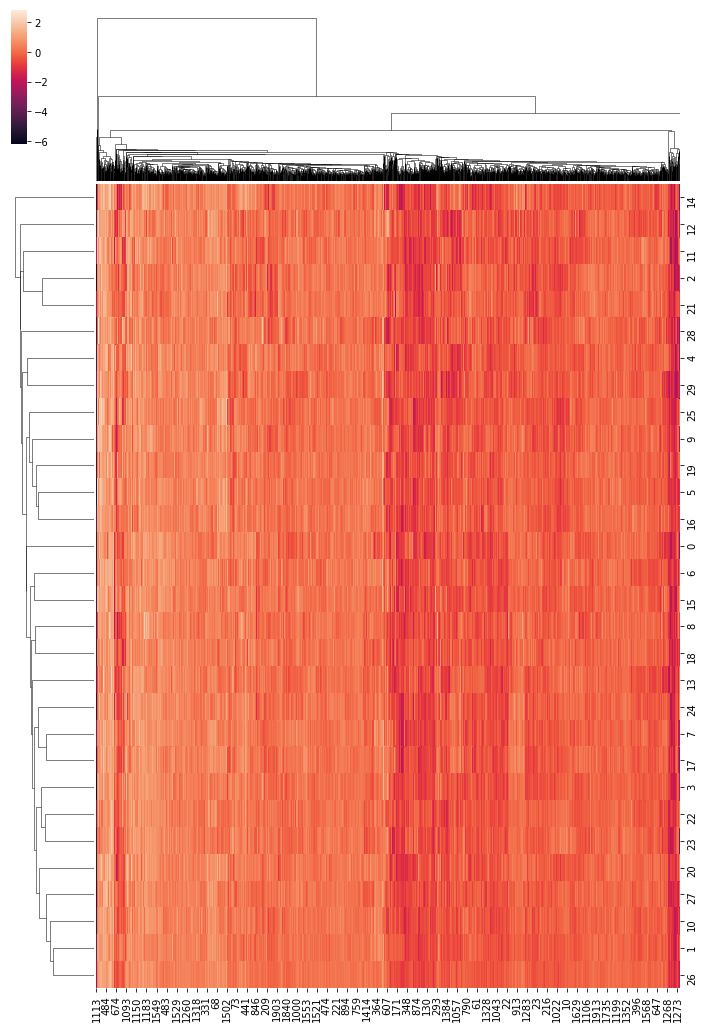

In [43]:
cltr=sn.clustermap(flat_train.values,figsize=(12,18))

In [44]:
reordered_isolates = cltr.dendrogram_row.reordered_ind

In [45]:
flat_IC50=train[["Isolate",'DHA_IC50']].drop_duplicates(keep='first')

flat_IC50.index = list(flat_IC50["Isolate"])

del flat_IC50["Isolate"]
flat_IC50

,DHA_IC50
isolate_01,2.1770
isolate_02,1.6970
isolate_03,1.7990
isolate_04,0.7100
isolate_05,2.0250
isolate_06,1.3670
isolate_07,0.8567
isolate_08,3.4600
isolate_09,1.7650
isolate_10,1.7540


## Save flat_IC50 to file

In [114]:
flat_IC50.to_csv('../data/flat_IC50.csv',sep=',')

In [47]:
flat_IC50.sort_values("DHA_IC50",ascending=False)

,DHA_IC50
isolate_08,3.4600
isolate_24,2.2360
isolate_16,2.2100
isolate_01,2.1770
isolate_05,2.0250
isolate_29,1.9900
isolate_19,1.9060
isolate_20,1.8240
isolate_11,1.8200
isolate_03,1.7990


### 3.3 Add the diferential between each timepoint-treatment combination

Add 4 columns containing the differential between the different timepoints and treatment combinations:

Delta_A=(24HR - 6HR) with DHA

Delta_B=(24HR - 6HR) with UT 

Delta_C=(DHA - UT) after 6HR

Delta_D=(DHA - UT) after 24HR


In [48]:
gene_deltas_dict={}
deltas_list=['_24HR_6HR_DHA','_24_6HR_UT','_DHA_UT_6HR','_DHA_UT_24HR']
for gene in genes_list:
    gene_deltas_dict[gene]=[gene+delta for delta in deltas_list]

In [49]:
gene_deltas_dict

{'PF3D7_1360200': ['PF3D7_1360200_24HR_6HR_DHA',
  'PF3D7_1360200_24_6HR_UT',
  'PF3D7_1360200_DHA_UT_6HR',
  'PF3D7_1360200_DHA_UT_24HR'],
 'PF3D7_1212800': ['PF3D7_1212800_24HR_6HR_DHA',
  'PF3D7_1212800_24_6HR_UT',
  'PF3D7_1212800_DHA_UT_6HR',
  'PF3D7_1212800_DHA_UT_24HR'],
 'PF3D7_1234600': ['PF3D7_1234600_24HR_6HR_DHA',
  'PF3D7_1234600_24_6HR_UT',
  'PF3D7_1234600_DHA_UT_6HR',
  'PF3D7_1234600_DHA_UT_24HR'],
 'PF3D7_1406700': ['PF3D7_1406700_24HR_6HR_DHA',
  'PF3D7_1406700_24_6HR_UT',
  'PF3D7_1406700_DHA_UT_6HR',
  'PF3D7_1406700_DHA_UT_24HR'],
 'PF3D7_1229400': ['PF3D7_1229400_24HR_6HR_DHA',
  'PF3D7_1229400_24_6HR_UT',
  'PF3D7_1229400_DHA_UT_6HR',
  'PF3D7_1229400_DHA_UT_24HR'],
 'PF3D7_0208200': ['PF3D7_0208200_24HR_6HR_DHA',
  'PF3D7_0208200_24_6HR_UT',
  'PF3D7_0208200_DHA_UT_6HR',
  'PF3D7_0208200_DHA_UT_24HR'],
 'PF3D7_1220900': ['PF3D7_1220900_24HR_6HR_DHA',
  'PF3D7_1220900_24_6HR_UT',
  'PF3D7_1220900_DHA_UT_6HR',
  'PF3D7_1220900_DHA_UT_24HR'],
 'PF3D7_0207500': ['

In [144]:
for gene in gene_dict.keys():
    
    state1=gene_dict[gene][0] #gene_24HR_DHA
    state2=gene_dict[gene][1] #gene_24HR_UT
    state3=gene_dict[gene][2] #gene_6HR_DHA
    state4=gene_dict[gene][3] #gene_6HR_UT
    
    delta_A=flat_train[state1]-flat_train[state3]
    delta_B=flat_train[state2]-flat_train[state4]
    delta_C=flat_train[state3]-flat_train[state4]
    delta_D=flat_train[state1]-flat_train[state2]
    
    delta_A_label=gene_deltas_dict[gene][0] #gene_24HR_6HR_DHA
    delta_B_label=gene_deltas_dict[gene][1] #gene_24HR_6HR_UT
    delta_C_label=gene_deltas_dict[gene][2] #gene_DHA_UT_6HR
    delta_D_label=gene_deltas_dict[gene][3] #gene_DHA_UT_24HR
    
    temp_df=pd.DataFrame({delta_A_label:delta_A,delta_B_label:delta_B,delta_C_label:delta_C,delta_D_label:delta_D})
    flat_train=pd.concat([flat_train,temp_df],axis=1)

In [145]:
flat_train.head(10)

,PF3D7_1360200_24HR_DHA,PF3D7_1360200_24HR_UT,PF3D7_1360200_6HR_DHA,PF3D7_1360200_6HR_UT,PF3D7_1212800_24HR_DHA,PF3D7_1212800_24HR_UT,PF3D7_1212800_6HR_DHA,PF3D7_1212800_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_0618500_DHA_UT_6HR,PF3D7_0618500_DHA_UT_24HR,PF3D7_0628200_24HR_6HR_DHA,PF3D7_0628200_24_6HR_UT,PF3D7_0628200_DHA_UT_6HR,PF3D7_0628200_DHA_UT_24HR,PF3D7_1368700_24HR_6HR_DHA,PF3D7_1368700_24_6HR_UT,PF3D7_1368700_DHA_UT_6HR,PF3D7_1368700_DHA_UT_24HR
isolate_01,-1.237558,0.196928,-0.539628,0.232753,0.631145,0.005077,0.451263,0.080951,0.432115,-0.406583,...,0.571128,0.564089,-0.013649,-0.384448,-0.422965,-0.052167,-0.330049,-0.132059,0.561004,0.363013
isolate_02,-0.398779,-0.374733,0.015598,-0.385285,0.034129,0.536841,0.156295,0.431583,-0.359269,-0.187211,...,-0.023408,-0.688128,0.286911,-0.028067,-0.129251,0.185726,0.163327,0.298354,0.191827,0.056801
isolate_03,-0.277068,-0.954536,0.144117,-1.065880,0.387218,0.556922,0.230177,0.444599,0.202430,0.167307,...,-1.236190,-0.663151,0.129896,-0.026631,0.066985,0.223512,0.400941,0.138671,0.331753,0.594023
isolate_04,0.140547,-0.054547,-0.388522,-0.722052,-0.119731,-0.158099,0.466390,0.673041,-0.465047,-0.738471,...,0.460820,0.578757,-0.041681,0.330944,-0.031242,-0.403866,-0.259940,-0.192218,0.147535,0.079813
isolate_05,0.337845,-0.991300,-0.103856,0.030470,-0.059112,0.446838,0.164930,-0.134692,-0.797104,0.297453,...,0.695048,-0.797551,0.268183,-0.000600,-0.000899,0.267883,0.463178,-0.175036,0.013171,0.651385
isolate_06,-0.312579,-0.106827,0.421387,-0.234074,0.171748,0.364637,0.098810,0.186255,0.017983,0.124795,...,0.171197,0.082365,0.212566,-0.270309,-0.358694,0.124181,-0.927764,-0.002150,0.658716,-0.266898
isolate_07,-0.172596,0.158326,-0.018289,0.095766,0.115648,0.412420,0.331132,-0.142801,-0.452015,-0.149757,...,0.782146,-0.643152,-0.072438,-0.312777,-0.156558,0.083781,-0.554097,0.895371,0.932359,-0.517109
isolate_08,0.319031,0.307684,-0.454762,-0.463972,-0.013410,0.092762,0.539381,-0.061578,-0.117850,-0.010984,...,0.349368,-0.429535,0.321757,0.084447,-0.277857,-0.040547,0.170933,0.548380,0.272618,-0.104829
isolate_09,-0.023701,0.385657,-0.886403,0.243450,0.274803,-0.045199,0.480150,0.181075,0.223599,-0.264987,...,-0.085909,0.348026,0.157434,-0.280939,0.033924,0.472297,-0.261031,-0.581333,0.655691,0.975993
isolate_10,-0.504003,0.667572,0.694347,-0.176062,0.572769,-0.036868,-0.402307,0.621018,-0.163682,-0.488134,...,-1.176018,0.484779,0.166597,0.005780,-0.385081,-0.224264,0.173418,-0.382696,-0.124260,0.431854


In [146]:
flat_train.to_csv('../data/flat_train.csv',sep=',')

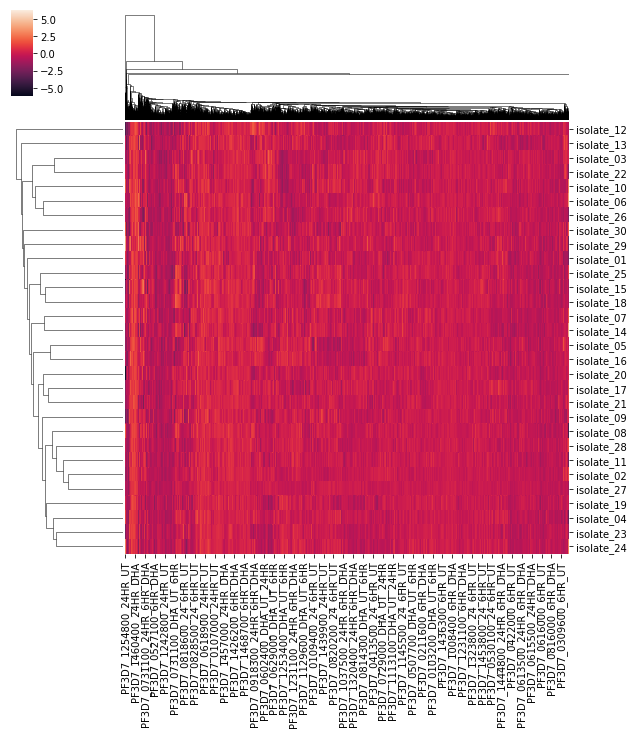

In [53]:
c = sn.clustermap(flat_train)

In [54]:
tmp = flat_train.copy()
tmp = pd.concat([flat_IC50, tmp], axis=1) 

In [55]:
tmp.head()

,DHA_IC50,PF3D7_1360200_24HR_DHA,PF3D7_1360200_24HR_UT,PF3D7_1360200_6HR_DHA,PF3D7_1360200_6HR_UT,PF3D7_1212800_24HR_DHA,PF3D7_1212800_24HR_UT,PF3D7_1212800_6HR_DHA,PF3D7_1212800_6HR_UT,PF3D7_1234600_24HR_DHA,...,PF3D7_0618500_DHA_UT_6HR,PF3D7_0618500_DHA_UT_24HR,PF3D7_0628200_24HR_6HR_DHA,PF3D7_0628200_24_6HR_UT,PF3D7_0628200_DHA_UT_6HR,PF3D7_0628200_DHA_UT_24HR,PF3D7_1368700_24HR_6HR_DHA,PF3D7_1368700_24_6HR_UT,PF3D7_1368700_DHA_UT_6HR,PF3D7_1368700_DHA_UT_24HR
isolate_01,2.177,-1.237558,0.196928,-0.539628,0.232753,0.631145,0.005077,0.451263,0.080951,0.432115,...,0.571128,0.564089,-0.013649,-0.384448,-0.422965,-0.052167,-0.330049,-0.132059,0.561004,0.363013
isolate_02,1.697,-0.398779,-0.374733,0.015598,-0.385285,0.034129,0.536841,0.156295,0.431583,-0.359269,...,-0.023408,-0.688128,0.286911,-0.028067,-0.129251,0.185726,0.163327,0.298354,0.191827,0.056801
isolate_03,1.799,-0.277068,-0.954536,0.144117,-1.065880,0.387218,0.556922,0.230177,0.444599,0.202430,...,-1.236190,-0.663151,0.129896,-0.026631,0.066985,0.223512,0.400941,0.138671,0.331753,0.594023
isolate_04,0.710,0.140547,-0.054547,-0.388522,-0.722052,-0.119731,-0.158099,0.466390,0.673041,-0.465047,...,0.460820,0.578757,-0.041681,0.330944,-0.031242,-0.403866,-0.259940,-0.192218,0.147535,0.079813
isolate_05,2.025,0.337845,-0.991300,-0.103856,0.030470,-0.059112,0.446838,0.164930,-0.134692,-0.797104,...,0.695048,-0.797551,0.268183,-0.000600,-0.000899,0.267883,0.463178,-0.175036,0.013171,0.651385


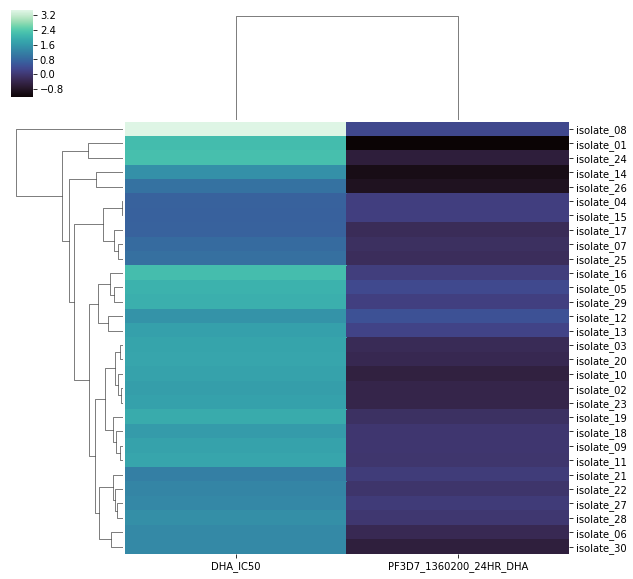

In [56]:
c = sn.clustermap(tmp.iloc[:,0:2], cmap="mako")

In [57]:
ic50 = tmp.pop("DHA_IC50")
reds_tuples = [(i,0,0) for i in np.linspace(0,1,30)]
reds_hex = [colors.to_hex(red) for red in reds_tuples]
greens_tuples = [(0,i,0) for i in np.linspace(0,1,30)]
greens_hex = [colors.to_hex(green) for green in greens_tuples]
blues_tuples = [(0,0,i) for i in np.linspace(0,1,30)]
blues_hex = [colors.to_hex(blue) for blue in blues_tuples]

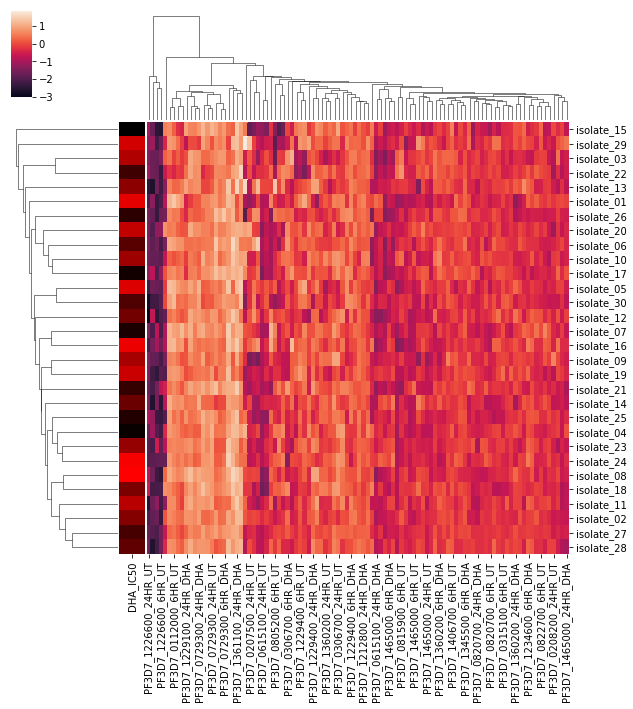

In [58]:
lut = dict(zip(ic50.sort_values(), reds_hex))
row_colors = ic50.map(lut)
g = sn.clustermap(tmp.iloc[:,0:100], row_colors=row_colors)

### 3.4 Make clustermaps by GO processes

In [59]:
GO.head(100)

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0015031,protein transport,1,"[PF3D7_1434700, PF3D7_0501300, PF3D7_0103100, ...",6
1,GO:0042147,"retrograde transport, endosome to Golgi",1,"[PF3D7_0103100, PF3D7_1250300, PF3D7_1110500, ...",4
2,GO:0015860,purine nucleoside transmembrane transport,1,"[PF3D7_1347200, PF3D7_0103200]",2
3,GO:2001139,negative regulation of phospholipid transport,1,[PF3D7_0104200],1
4,GO:0015914,phospholipid transport,1,"[PF3D7_0104200, PF3D7_1463500, PF3D7_1219600]",3
5,GO:0060627,regulation of vesicle-mediated transport,1,"[PF3D7_1144900, PF3D7_0211200, PF3D7_1231100, ...",10
6,GO:0000278,mitotic cell cycle,1,"[PF3D7_0107000, PF3D7_1446600, PF3D7_0317200, ...",4
7,GO:0009405,pathogenesis,1,"[PF3D7_0826100, PF3D7_1209300, PF3D7_1302200, ...",10
8,GO:0010998,regulation of translational initiation by eIF2...,1,[PF3D7_0107600],1
9,GO:0007021,tubulin complex assembly,1,[PF3D7_0109400],1


In [60]:
def getGenesFromGO(GO_process_ID):
    return list(GO[GO["GO Process ID"]==GO_process_ID]["Gene_ID"])[0]

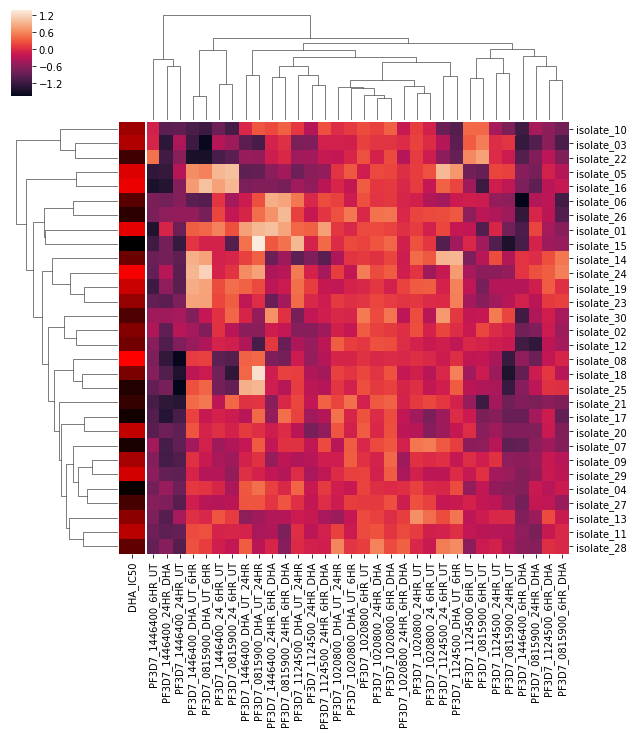

In [61]:
genes_selected = getGenesFromGO("GO:0006086")
cols = [gene_dict[gene] + gene_deltas_dict[gene] for gene in genes_selected]
final_cols = []
for col in cols:
    final_cols = final_cols + col
lut = dict(zip(ic50.sort_values(), reds_hex))
row_colors = ic50.map(lut)
g = sn.clustermap(tmp[final_cols], row_colors=row_colors)

In [62]:
ic50.sort_values()

isolate_15    0.6933
isolate_04    0.7100
isolate_17    0.7200
isolate_07    0.8567
isolate_25    0.9350
isolate_26    0.9667
isolate_21    1.1900
isolate_22    1.2830
isolate_27    1.3480
isolate_30    1.3630
isolate_06    1.3670
isolate_28    1.4530
isolate_14    1.4700
isolate_12    1.5170
isolate_18    1.6470
isolate_02    1.6970
isolate_13    1.7230
isolate_23    1.7440
isolate_10    1.7540
isolate_09    1.7650
isolate_03    1.7990
isolate_11    1.8200
isolate_20    1.8240
isolate_19    1.9060
isolate_29    1.9900
isolate_05    2.0250
isolate_01    2.1770
isolate_16    2.2100
isolate_24    2.2360
isolate_08    3.4600
Name: DHA_IC50, dtype: float64

## 4. Format the test data to look the same as flat_train

In [63]:
test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,0.416583,-2.304394,-1.279308,-1.128485,0.129698,...,0.117763,-1.650283,-0.520373,-1.301428,-5.326124,-0.352736,-1.567931,-4.446439,-1.875440,NaN
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,0.247195,-2.176939,-1.470318,-0.676434,-0.206543,...,0.472336,-1.151134,-0.342707,-1.001569,-5.337602,-0.672201,-1.494983,-4.299427,-1.553652,NaN
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,-0.197699,-0.572531,0.270896,0.557528,-0.698585,...,-0.309768,-6.330446,-0.850889,-1.603832,-3.256602,-2.517157,-0.650735,-4.841146,0.153951,NaN
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,0.966916,-1.723830,-1.102392,-0.797996,0.032847,...,-0.254186,-1.516661,-1.916219,-1.858716,-6.483167,-0.827476,-1.454423,-5.264615,-2.367444,NaN
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,0.125273,-1.665749,-2.510245,-1.454094,-1.763451,...,0.653097,-2.383878,-2.731928,-2.557962,-5.697488,-3.466542,-2.147289,-4.358510,-1.929927,NaN


### 4.1 Filter the trest DataFrame 

Keep only the important genes found in steps 2.1 to 2.4.

In [116]:
genes_to_keep_test = set(list(test.columns)) & set(result)
genes_to_keep_test = list(genes_to_keep_test)
columns_to_keep_test = list(test.columns)[0:5] + \
[list(test.columns)[-1]] + genes_to_keep_test
columns_to_keep_test

['Sample_Names',
 'Isolate',
 'Timepoint',
 'Treatment',
 'BioRep',
 'DHA_IC50',
 'PF3D7_1360200',
 'PF3D7_1212800',
 'PF3D7_1234600',
 'PF3D7_1406700',
 'PF3D7_1229400',
 'PF3D7_0208200',
 'PF3D7_1220900',
 'PF3D7_0207500',
 'PF3D7_0315100',
 'PF3D7_1340700',
 'PF3D7_0615100',
 'PF3D7_1465000',
 'PF3D7_1229800',
 'PF3D7_0822700',
 'PF3D7_1226600',
 'PF3D7_0820700',
 'PF3D7_0805200',
 'PF3D7_1008000',
 'PF3D7_1229100',
 'PF3D7_0815900',
 'PF3D7_0306700',
 'PF3D7_1361100',
 'PF3D7_0729300',
 'PF3D7_1345500',
 'PF3D7_0112000',
 'PF3D7_0718500',
 'PF3D7_1116800',
 'PF3D7_0828000',
 'PF3D7_1037100',
 'PF3D7_1319700',
 'PF3D7_0109400',
 'PF3D7_1418100',
 'PF3D7_1032500',
 'PF3D7_0811200',
 'PF3D7_1461200',
 'PF3D7_1318800',
 'PF3D7_0216400',
 'PF3D7_0111000',
 'PF3D7_1122900',
 'PF3D7_1364900',
 'PF3D7_1122100',
 'PF3D7_0816500',
 'PF3D7_0801300',
 'PF3D7_0213100',
 'PF3D7_1250300',
 'PF3D7_1248900',
 'PF3D7_1134000',
 'PF3D7_1032400',
 'PF3D7_0629300',
 'PF3D7_1367600',
 'PF3D7_1429800',
 

In [117]:
filtered_test = test[columns_to_keep_test]
filtered_test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,DHA_IC50,PF3D7_1360200,PF3D7_1212800,PF3D7_1234600,PF3D7_1406700,...,PF3D7_1116400,PF3D7_1129100,PF3D7_1418000,PF3D7_0208600,PF3D7_1231100,PF3D7_1330600,PF3D7_1450100,PF3D7_0618500,PF3D7_0628200,PF3D7_1368700
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,NaN,0.157434,-0.024628,-0.405375,-0.149423,...,0.739385,0.362266,0.020503,0.031832,0.134872,0.266426,0.049762,-0.493842,-0.038588,-0.100338
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,NaN,-0.506984,0.280850,0.015625,0.262886,...,0.469329,-0.526775,-0.380828,-0.234951,-0.564904,-0.320411,0.000808,-0.112661,0.188435,-1.230002
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,NaN,-0.021262,0.791448,-0.163801,0.397770,...,0.477248,-0.390607,-0.550708,0.194289,-0.586727,0.078037,-0.290751,0.533075,0.026505,-0.483769
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,NaN,-0.569957,0.332409,-0.178014,-0.139470,...,0.473887,-0.806349,-0.869459,0.004015,-0.237400,-0.446258,-0.174372,0.103606,0.229638,-0.444590
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,NaN,-0.069562,0.425914,-0.726166,-0.630887,...,1.004726,-0.128651,-0.365700,0.277542,0.543573,-0.257311,0.179936,-0.137560,0.213195,0.576386


### 4.2 Create new test DataFrame with engineered features

In [118]:
aggregated_means_test = filtered_test.groupby(["Isolate","Timepoint","Treatment"]).mean()
aggregated_means_test.head()

DHA_IC50  PF3D7_1360200  PF3D7_1212800  \
Isolate    Timepoint Treatment                                           
isolate_31 24HR      DHA             NaN      -0.174775       0.128111   
                     UT              NaN      -0.295609       0.561929   
           6HR       DHA             NaN      -0.416325       0.345033   
                     UT              NaN       0.298822       0.056966   
isolate_32 24HR      DHA             NaN       0.399533       0.066858   

                                PF3D7_1234600  PF3D7_1406700  PF3D7_1229400  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.194875       0.056731       0.584500   
                     UT             -0.170907       0.129150       0.549542   
           6HR       DHA            -0.043260      -0.141885       0.215850   
                     UT             -0.607917      -0.268777       0.513967   
isolate_32 24HR      DHA            -0.138635      -0.326148       0.953146   

                                PF3D7_0208200  PF3D7_1220900  PF3D7_0207500  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.624821      -0.656536      -0.899982   
                     UT             -0.475508      -0.954394      -0.952430   
           6HR       DHA            -0.573514      -0.203688      -0.080714   
                     UT             -0.656479       0.031952      -0.594457   
isolate_32 24HR      DHA             0.021299      -0.188034      -0.541789   

                                PF3D7_0315100  ...  PF3D7_1116400  \
Isolate    Timepoint Treatment                 ...                  
isolate_31 24HR      DHA            -0.360186  ...       0.604357   
                     UT             -0.871390  ...       0.475568   
           6HR       DHA            -0.382356  ...       0.753391   
                     UT             -0.078077  ...       0.827587   
isolate_32 24HR      DHA             0.397658  ...       0.695734   

                                PF3D7_1129100  PF3D7_1418000  PF3D7_0208600  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.082254      -0.180162      -0.101560   
                     UT             -0.598478      -0.710083       0.099152   
           6HR       DHA            -0.371874      -0.404523       0.268849   
                     UT              0.146693       0.022647       0.251104   
isolate_32 24HR      DHA            -0.053608      -0.070884       0.085707   

                                PF3D7_1231100  PF3D7_1330600  PF3D7_1450100  \
Isolate    Timepoint Treatment                                                
isolate_31 24HR      DHA            -0.215016      -0.026993       0.025285   
                     UT             -0.412064      -0.184111      -0.232562   
           6HR       DHA             0.131851      -0.111504       0.176336   
                     UT              0.558998       0.021236       0.083339   
isolate_32 24HR      DHA             0.337521       0.037439       0.581076   

                                PF3D7_0618500  PF3D7_0628200  PF3D7_1368700  
Isolate    Timepoint Treatment                                               
isolate_31 24HR      DHA            -0.303251       0.074923      -0.665170  
                     UT              0.318340       0.128071      -0.464179  
           6HR       DHA             0.176975       0.201754       0.200564  
                     UT             -0.167897       0.322829       0.491666  
isolate_32 24HR      DHA            -0.254844       0.327590      -0.059409  

[5 rows x 482 columns]

### 4.3 Flatten the aggregated_means_test data frame 
See point 3.2 for reference

In [119]:
isolates_list_test=aggregated_means_test.index.get_level_values(0)
isolates_list_test=list(dict.fromkeys(isolates_list_test))
isolates_list_test

['isolate_31',
 'isolate_32',
 'isolate_33',
 'isolate_34',
 'isolate_35',
 'isolate_36',
 'isolate_37',
 'isolate_38',
 'isolate_39',
 'isolate_40',
 'isolate_41',
 'isolate_42',
 'isolate_43',
 'isolate_44',
 'isolate_45',
 'isolate_46',
 'isolate_47',
 'isolate_48',
 'isolate_49',
 'isolate_50',
 'isolate_51',
 'isolate_52',
 'isolate_53',
 'isolate_54',
 'isolate_55']

## Save isolates_list_test to file

In [120]:
f = open("../data/isolates_test.txt", "w")
f.write("\n".join(isolates_list_test))
f.close()

In [121]:
flat_test=pd.DataFrame()
genes=[]
for gene in genes_list:
    temp_list=[]
    for isolate in isolates_list_test:
        temp_list.append(aggregated_means_test.loc[isolate][gene].tolist())
    flat_test=pd.concat([flat_test,pd.DataFrame(data=temp_list,columns=gene_dict[gene])],axis=1)

In [122]:
flat_test.head()

,PF3D7_1360200_24HR_DHA,PF3D7_1360200_24HR_UT,PF3D7_1360200_6HR_DHA,PF3D7_1360200_6HR_UT,PF3D7_1212800_24HR_DHA,PF3D7_1212800_24HR_UT,PF3D7_1212800_6HR_DHA,PF3D7_1212800_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_0618500_6HR_DHA,PF3D7_0618500_6HR_UT,PF3D7_0628200_24HR_DHA,PF3D7_0628200_24HR_UT,PF3D7_0628200_6HR_DHA,PF3D7_0628200_6HR_UT,PF3D7_1368700_24HR_DHA,PF3D7_1368700_24HR_UT,PF3D7_1368700_6HR_DHA,PF3D7_1368700_6HR_UT
0,-0.174775,-0.295609,-0.416325,0.298822,0.128111,0.561929,0.345033,0.056966,-0.194875,-0.170907,...,0.176975,-0.167897,0.074923,0.128071,0.201754,0.322829,-0.665170,-0.464179,0.200564,0.491666
1,0.399533,0.146867,0.324318,0.315899,0.066858,0.027401,0.067937,-0.464352,-0.138635,-0.733134,...,-0.247042,-0.294130,0.327590,0.263088,0.154990,0.244134,-0.059409,0.168173,0.154043,-0.440608
2,-0.176645,-0.544585,0.019547,-0.417121,0.138302,0.526993,0.138940,-0.084193,-0.051677,-0.083284,...,0.334191,0.027980,0.184788,0.157580,0.304123,0.134417,-0.499797,0.029223,-0.014963,-0.335507
3,-0.417563,-0.403714,0.338701,0.404703,0.301630,0.463055,0.053077,0.119237,-0.006026,0.184238,...,0.254208,-0.854409,0.097930,0.015154,0.400350,0.357595,-0.319401,-0.256127,-0.571124,0.381458
4,-0.479479,-0.105337,0.544339,-0.924440,0.221467,0.114849,-0.033903,0.292947,0.130474,-0.274636,...,-0.646723,0.057110,0.089400,0.322346,0.314213,0.253874,-0.315790,0.205234,0.582892,-0.221195


### 4.4 Add the diferential between each timepoint-treatment combination
See point 3.3 for reference

In [123]:
for gene in gene_dict.keys():
    
    state1=gene_dict[gene][0] #gene_24HR_DHA
    state2=gene_dict[gene][1] #gene_24HR_UT
    state3=gene_dict[gene][2] #gene_6HR_DHA
    state4=gene_dict[gene][3] #gene_6HR_UT
    
    delta_A=flat_test[state1]-flat_test[state3]
    delta_B=flat_test[state2]-flat_test[state4]
    delta_C=flat_test[state3]-flat_test[state4]
    delta_D=flat_test[state1]-flat_test[state2]
    
    delta_A_label=gene_deltas_dict[gene][0] #gene_24HR_6HR_DHA
    delta_B_label=gene_deltas_dict[gene][1] #gene_24HR_6HR_UT
    delta_C_label=gene_deltas_dict[gene][2] #gene_DHA_UT_6HR
    delta_D_label=gene_deltas_dict[gene][3] #gene_DHA_UT_24HR
    
    temp_df=pd.DataFrame({delta_A_label:delta_A,delta_B_label:delta_B,delta_C_label:delta_C,delta_D_label:delta_D})
    flat_test=pd.concat([flat_test,temp_df],axis=1)

In [126]:
flat_test.head()
flat_test.index=isolates_list_test
flat_test.head()

,PF3D7_1360200_24HR_DHA,PF3D7_1360200_24HR_UT,PF3D7_1360200_6HR_DHA,PF3D7_1360200_6HR_UT,PF3D7_1212800_24HR_DHA,PF3D7_1212800_24HR_UT,PF3D7_1212800_6HR_DHA,PF3D7_1212800_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_0618500_DHA_UT_6HR,PF3D7_0618500_DHA_UT_24HR,PF3D7_0628200_24HR_6HR_DHA,PF3D7_0628200_24_6HR_UT,PF3D7_0628200_DHA_UT_6HR,PF3D7_0628200_DHA_UT_24HR,PF3D7_1368700_24HR_6HR_DHA,PF3D7_1368700_24_6HR_UT,PF3D7_1368700_DHA_UT_6HR,PF3D7_1368700_DHA_UT_24HR
isolate_31,-0.174775,-0.295609,-0.416325,0.298822,0.128111,0.561929,0.345033,0.056966,-0.194875,-0.170907,...,0.344871,-0.621592,-0.126831,-0.194757,-0.121074,-0.053148,-0.865734,-0.955845,-0.291102,-0.200991
isolate_32,0.399533,0.146867,0.324318,0.315899,0.066858,0.027401,0.067937,-0.464352,-0.138635,-0.733134,...,0.047088,0.380829,0.172600,0.018954,-0.089144,0.064502,-0.213451,0.608781,0.594650,-0.227582
isolate_33,-0.176645,-0.544585,0.019547,-0.417121,0.138302,0.526993,0.138940,-0.084193,-0.051677,-0.083284,...,0.306211,-0.093699,-0.119335,0.023164,0.169706,0.027207,-0.484834,0.364730,0.320544,-0.529020
isolate_34,-0.417563,-0.403714,0.338701,0.404703,0.301630,0.463055,0.053077,0.119237,-0.006026,0.184238,...,1.108617,0.198459,-0.302420,-0.342440,0.042755,0.082776,0.251723,-0.637584,-0.952582,-0.063275
isolate_35,-0.479479,-0.105337,0.544339,-0.924440,0.221467,0.114849,-0.033903,0.292947,0.130474,-0.274636,...,-0.703833,0.573340,-0.224813,0.068472,0.060340,-0.232946,-0.898682,0.426429,0.804087,-0.521024


In [127]:
flat_test.to_csv('../data/flat_test.csv',sep=',')

## Save the genes_dict to a file

In [128]:
genes_dict={}
for gene in gene_dict:
    genes_dict[gene]=gene_dict[gene]+gene_deltas_dict[gene]
genes_dict

{'PF3D7_1360200': ['PF3D7_1360200_24HR_DHA',
  'PF3D7_1360200_24HR_UT',
  'PF3D7_1360200_6HR_DHA',
  'PF3D7_1360200_6HR_UT',
  'PF3D7_1360200_24HR_6HR_DHA',
  'PF3D7_1360200_24_6HR_UT',
  'PF3D7_1360200_DHA_UT_6HR',
  'PF3D7_1360200_DHA_UT_24HR'],
 'PF3D7_1212800': ['PF3D7_1212800_24HR_DHA',
  'PF3D7_1212800_24HR_UT',
  'PF3D7_1212800_6HR_DHA',
  'PF3D7_1212800_6HR_UT',
  'PF3D7_1212800_24HR_6HR_DHA',
  'PF3D7_1212800_24_6HR_UT',
  'PF3D7_1212800_DHA_UT_6HR',
  'PF3D7_1212800_DHA_UT_24HR'],
 'PF3D7_1234600': ['PF3D7_1234600_24HR_DHA',
  'PF3D7_1234600_24HR_UT',
  'PF3D7_1234600_6HR_DHA',
  'PF3D7_1234600_6HR_UT',
  'PF3D7_1234600_24HR_6HR_DHA',
  'PF3D7_1234600_24_6HR_UT',
  'PF3D7_1234600_DHA_UT_6HR',
  'PF3D7_1234600_DHA_UT_24HR'],
 'PF3D7_1406700': ['PF3D7_1406700_24HR_DHA',
  'PF3D7_1406700_24HR_UT',
  'PF3D7_1406700_6HR_DHA',
  'PF3D7_1406700_6HR_UT',
  'PF3D7_1406700_24HR_6HR_DHA',
  'PF3D7_1406700_24_6HR_UT',
  'PF3D7_1406700_DHA_UT_6HR',
  'PF3D7_1406700_DHA_UT_24HR'],
 'PF3D7_

In [129]:
genes_df=pd.DataFrame()
for gene in genes_dict:
    temp_df=pd.DataFrame({gene: genes_dict[gene]})
    genes_df=pd.concat([genes_df,temp_df],axis=1)

In [130]:
genes_df

,PF3D7_1360200,PF3D7_1212800,PF3D7_1234600,PF3D7_1406700,PF3D7_1229400,PF3D7_0208200,PF3D7_1220900,PF3D7_0207500,PF3D7_0315100,PF3D7_1340700,...,PF3D7_1116400,PF3D7_1129100,PF3D7_1418000,PF3D7_0208600,PF3D7_1231100,PF3D7_1330600,PF3D7_1450100,PF3D7_0618500,PF3D7_0628200,PF3D7_1368700
0,PF3D7_1360200_24HR_DHA,PF3D7_1212800_24HR_DHA,PF3D7_1234600_24HR_DHA,PF3D7_1406700_24HR_DHA,PF3D7_1229400_24HR_DHA,PF3D7_0208200_24HR_DHA,PF3D7_1220900_24HR_DHA,PF3D7_0207500_24HR_DHA,PF3D7_0315100_24HR_DHA,PF3D7_1340700_24HR_DHA,...,PF3D7_1116400_24HR_DHA,PF3D7_1129100_24HR_DHA,PF3D7_1418000_24HR_DHA,PF3D7_0208600_24HR_DHA,PF3D7_1231100_24HR_DHA,PF3D7_1330600_24HR_DHA,PF3D7_1450100_24HR_DHA,PF3D7_0618500_24HR_DHA,PF3D7_0628200_24HR_DHA,PF3D7_1368700_24HR_DHA
1,PF3D7_1360200_24HR_UT,PF3D7_1212800_24HR_UT,PF3D7_1234600_24HR_UT,PF3D7_1406700_24HR_UT,PF3D7_1229400_24HR_UT,PF3D7_0208200_24HR_UT,PF3D7_1220900_24HR_UT,PF3D7_0207500_24HR_UT,PF3D7_0315100_24HR_UT,PF3D7_1340700_24HR_UT,...,PF3D7_1116400_24HR_UT,PF3D7_1129100_24HR_UT,PF3D7_1418000_24HR_UT,PF3D7_0208600_24HR_UT,PF3D7_1231100_24HR_UT,PF3D7_1330600_24HR_UT,PF3D7_1450100_24HR_UT,PF3D7_0618500_24HR_UT,PF3D7_0628200_24HR_UT,PF3D7_1368700_24HR_UT
2,PF3D7_1360200_6HR_DHA,PF3D7_1212800_6HR_DHA,PF3D7_1234600_6HR_DHA,PF3D7_1406700_6HR_DHA,PF3D7_1229400_6HR_DHA,PF3D7_0208200_6HR_DHA,PF3D7_1220900_6HR_DHA,PF3D7_0207500_6HR_DHA,PF3D7_0315100_6HR_DHA,PF3D7_1340700_6HR_DHA,...,PF3D7_1116400_6HR_DHA,PF3D7_1129100_6HR_DHA,PF3D7_1418000_6HR_DHA,PF3D7_0208600_6HR_DHA,PF3D7_1231100_6HR_DHA,PF3D7_1330600_6HR_DHA,PF3D7_1450100_6HR_DHA,PF3D7_0618500_6HR_DHA,PF3D7_0628200_6HR_DHA,PF3D7_1368700_6HR_DHA
3,PF3D7_1360200_6HR_UT,PF3D7_1212800_6HR_UT,PF3D7_1234600_6HR_UT,PF3D7_1406700_6HR_UT,PF3D7_1229400_6HR_UT,PF3D7_0208200_6HR_UT,PF3D7_1220900_6HR_UT,PF3D7_0207500_6HR_UT,PF3D7_0315100_6HR_UT,PF3D7_1340700_6HR_UT,...,PF3D7_1116400_6HR_UT,PF3D7_1129100_6HR_UT,PF3D7_1418000_6HR_UT,PF3D7_0208600_6HR_UT,PF3D7_1231100_6HR_UT,PF3D7_1330600_6HR_UT,PF3D7_1450100_6HR_UT,PF3D7_0618500_6HR_UT,PF3D7_0628200_6HR_UT,PF3D7_1368700_6HR_UT
4,PF3D7_1360200_24HR_6HR_DHA,PF3D7_1212800_24HR_6HR_DHA,PF3D7_1234600_24HR_6HR_DHA,PF3D7_1406700_24HR_6HR_DHA,PF3D7_1229400_24HR_6HR_DHA,PF3D7_0208200_24HR_6HR_DHA,PF3D7_1220900_24HR_6HR_DHA,PF3D7_0207500_24HR_6HR_DHA,PF3D7_0315100_24HR_6HR_DHA,PF3D7_1340700_24HR_6HR_DHA,...,PF3D7_1116400_24HR_6HR_DHA,PF3D7_1129100_24HR_6HR_DHA,PF3D7_1418000_24HR_6HR_DHA,PF3D7_0208600_24HR_6HR_DHA,PF3D7_1231100_24HR_6HR_DHA,PF3D7_1330600_24HR_6HR_DHA,PF3D7_1450100_24HR_6HR_DHA,PF3D7_0618500_24HR_6HR_DHA,PF3D7_0628200_24HR_6HR_DHA,PF3D7_1368700_24HR_6HR_DHA
5,PF3D7_1360200_24_6HR_UT,PF3D7_1212800_24_6HR_UT,PF3D7_1234600_24_6HR_UT,PF3D7_1406700_24_6HR_UT,PF3D7_1229400_24_6HR_UT,PF3D7_0208200_24_6HR_UT,PF3D7_1220900_24_6HR_UT,PF3D7_0207500_24_6HR_UT,PF3D7_0315100_24_6HR_UT,PF3D7_1340700_24_6HR_UT,...,PF3D7_1116400_24_6HR_UT,PF3D7_1129100_24_6HR_UT,PF3D7_1418000_24_6HR_UT,PF3D7_0208600_24_6HR_UT,PF3D7_1231100_24_6HR_UT,PF3D7_1330600_24_6HR_UT,PF3D7_1450100_24_6HR_UT,PF3D7_0618500_24_6HR_UT,PF3D7_0628200_24_6HR_UT,PF3D7_1368700_24_6HR_UT
6,PF3D7_1360200_DHA_UT_6HR,PF3D7_1212800_DHA_UT_6HR,PF3D7_1234600_DHA_UT_6HR,PF3D7_1406700_DHA_UT_6HR,PF3D7_1229400_DHA_UT_6HR,PF3D7_0208200_DHA_UT_6HR,PF3D7_1220900_DHA_UT_6HR,PF3D7_0207500_DHA_UT_6HR,PF3D7_0315100_DHA_UT_6HR,PF3D7_1340700_DHA_UT_6HR,...,PF3D7_1116400_DHA_UT_6HR,PF3D7_1129100_DHA_UT_6HR,PF3D7_1418000_DHA_UT_6HR,PF3D7_0208600_DHA_UT_6HR,PF3D7_1231100_DHA_UT_6HR,PF3D7_1330600_DHA_UT_6HR,PF3D7_1450100_DHA_UT_6HR,PF3D7_0618500_DHA_UT_6HR,PF3D7_0628200_DHA_UT_6HR,PF3D7_1368700_DHA_UT_6HR
7,PF3D7_1360200_DHA_UT_24HR,PF3D7_1212800_DHA_UT_24HR,PF3D7_1234600_DHA_UT_24HR,PF3D7_1406700_DHA_UT_24HR,PF3D7_1229400_DHA_UT_24HR,PF3D7_0208200_DHA_UT_24HR,PF3D7_1220900_DHA_UT_24HR,PF3D7_0207500_DHA_UT_24HR,PF3D7_0315100_DHA_UT_24HR,PF3D7_1340700_DHA_UT_24HR,...,PF3D7_1116400_DHA_UT_24HR,PF3D7_1129100_DHA_UT_24HR,PF3D7_1418000_DHA_UT_24HR,PF3D7_0208600_DHA_UT_24HR,PF3D7_1231100_DHA_UT_24

In [131]:
genes_df.to_csv('../data/genes_column_labels.csv')

In [133]:
flat_test['PF3D7_0730200_DHA_UT_6HR']

isolate_31   -0.231848
isolate_32    0.132664
isolate_33   -0.304124
isolate_34   -0.284705
isolate_35    0.220958
isolate_36   -0.564893
isolate_37    0.050743
isolate_38    0.448023
isolate_39    0.286537
isolate_40   -0.431782
isolate_41    0.159463
isolate_42   -0.720405
isolate_43   -0.337212
isolate_44   -0.026372
isolate_45   -0.408183
isolate_46    0.219530
isolate_47   -0.011925
isolate_48    0.294154
isolate_49    0.106570
isolate_50   -0.018818
isolate_51   -0.082297
isolate_52   -0.520643
isolate_53   -0.072527
isolate_54   -0.329787
isolate_55    0.042247
Name: PF3D7_0730200_DHA_UT_6HR, dtype: float64